# Metadata

```
Course:   DS 5100
Module:   07 Pandas
Topic:    Introducting Pandas
Author:   R.C. Alvarado (adapted)
Date:     28 June 2022
```


# Concepts

- DataFrame
- Creating DataFrames
- Copy: shallow vs deep
- Appending columns
- Slicing or subsetting by location, label (name)
- Boolean indexing
- Sorting
- Handling missing data
- Statistics

# Pandas DataFrames

Just as NumPy introduces the n-dimensional array as a new data structure to Python, so Pandas introduces two:

The **Series**: a 1-dimensional labeled array capable of holding any data type.

The **DataFrame**: a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a `dict` of Series 

⭐ Note: Pandas used to have a 3-dimensional structure called a **panel**, but it has been removed from the library. Ironically, the name "pandas" was partly derived the word "panel": `pan(el)-da(ta)-s`. To handle higher dimensional data, the Pandas team suggests using [XArray](https://xarray.pydata.org/en/stable/).

By far, the most important data structure in Pandas is the dataframe, with the series playing a supporting -- but crucial -- role. 

In fact, dataframe objects are built out of series objects.

So, **to understand what a dataframe is and how it behaves, you need to understand what is series is and how it is constructed.**

Before going into that, here are two quick observations about dataframes:

First, dataframes are **inspired by the R structure** of the same name. They have many similarities, but there are fundamental differences between the two that go beyond mere language differences. Most important is the Pandas dataframes have **indexes**, whereas R dataframes do not.

Second, it is helpful to think of Pandas as wrapper around NumPy and Matplotlib that makes it much easier to perform common operations, like select data by column name or visualizing plots. But this comes at a cost -- Pandas is slower than NumPy. The represents the classic trade-off between **ease-of-use** for humnas and machine **performance**.

# Series Objects

## Axis labels 

The axis labels are collectively referred to as the index. The basic method to create a Series is to call:



The term panel data is derived from econometrics and is partially responsible for the name pandas: pan(el)-da(ta)-s. 

The names for the 3 axes are intended to give some semantic meaning to describing operations involving panel data and, in particular, econometric analysis of panel data. However, for the strict purposes of slicing and dicing a collection of DataFrame objects, you may find the axis names slightly arbitrary:

items: axis 0, each item corresponds to a DataFrame contained inside
major_axis: axis 1, it is the index (rows) of each of the DataFrames
minor_axis: axis 2, it is the columns of each of the DataFrames

Dict of 1D ndarrays, lists, dicts, or Series
2-D numpy.ndarray
Structured or record ndarray
A Series
Another DataFrame
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

Pandas DataFrames were modeled from R Data Frames.

- They hold rectangular data (columns are equal length)
- Can hold mixed data types, but each column has same type
- Contains three attributes:
  - index (a column of index values; can use to sort, subset data)
  - columns
  - values (as a numpy array)

Pandas `Series` holds a single column of data.  

For shorthand, `df` will refer to pandas DataFrames.  

DataFrames can be created with pandas.    
Various formats (`csv`,`json`,...) can be loaded into DataFrames.   

The [ten minutes to pandas link](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) above gives a good, brief overview of pandas. Be sure to review.

Import pandas like this, where the alias `pd` is convention:

In [1]:
import pandas as pd

# DataFrames Constructors

Several ways to create pandas dataframes

- Passing a dictionary of objects:

In [2]:
# x, y, z are lists in the dict

df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]})
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [3]:
print('attributes of df:')
print('index          :', df.index)
print('columns        :', df.columns)
print('data           :\n', df.values)
print('               ')
print('type(df.values):', type(df.values))

attributes of df:
index          : RangeIndex(start=0, stop=4, step=1)
columns        : Index(['x', 'y', 'z'], dtype='object')
data           :
 [[0 1 True]
 [2 1 False]
 [1 0 False]
 [5 0 False]]
               
type(df.values): <class 'numpy.ndarray'>


In [4]:
list(df.columns)

['x', 'y', 'z']

In [5]:
list(df.index)

[0, 1, 2, 3]

- Passing the three required pieces:
  - columns as list
  - index as list
  - data as list of lists

In [6]:
df2 = pd.DataFrame(columns=['x','y'], index=['row1','row2','row3'], data=[[9,3],[1,2],[4,6]])
df2

,x,y
row1,9,3
row2,1,2
row3,4,6


# Copying DataFrames with `copy()`

Use `copy()` to give the new df a clean break from the original.  
Otherwise, the copied df will mirror changes in the original.

In [7]:
df_deep    = df.copy()  # deep copy; changes to df will not pass through
df_shallow = df         # shallow copy; changes to df will pass through

print('--df')
print(df)

# update values in df.x
df.x = 1

print('--Updated df')
print(df)
print('--df_shallow')
print(df_shallow)
print('--df_deep')
print(df_deep)

# rebuild df
df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]}) 

--df
   x  y      z
0  0  1   True
1  2  1  False
2  1  0  False
3  5  0  False
--Updated df
   x  y      z
0  1  1   True
1  1  1  False
2  1  0  False
3  1  0  False
--df_shallow
   x  y      z
0  1  1   True
1  1  1  False
2  1  0  False
3  1  0  False
--df_deep
   x  y      z
0  0  1   True
1  2  1  False
2  1  0  False
3  5  0  False


Notice `df_shallow` mirrors changes to `df`, since it references its indices and data.  
`df_deep` does not reference `df`, and so changes `to` df do not impact `df_deep`.

# Show the data type of each column:

In [8]:
df.dtypes

x    int64
y    int64
z     bool
dtype: object

In [9]:
?df.dtypes

Type:        property
String form: <property object at 0x7f8a14155090>
Docstring:  
Return the dtypes in the DataFrame.

This returns a Series with the data type of each column.
The result's index is the original DataFrame's columns. Columns
with mixed types are stored with the ``object`` dtype. See
:ref:`the User Guide <basics.dtypes>` for more.

Returns
-------
pandas.Series
    The data type of each column.

Examples
--------
>>> df = pd.DataFrame({'float': [1.0],
...                    'int': [1],
...                    'datetime': [pd.Timestamp('20180310')],
...                    'string': ['foo']})
>>> df.dtypes
float              float64
int                  int64
datetime    datetime64[ns]
string              object
dtype: object


# Column Renaming

Can rename one or more fields at once using a dict.  

Rename the field `z` to `is_label`:

In [10]:
df = df.rename(columns={'z':'is_label'})
df

,x,y,is_label
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


# Column Referencing

Can use bracket notation or dot notation.  

- bracket notation: variable name must be a string

In [11]:
df['y']

0    1
1    1
2    0
3    0
Name: y, dtype: int64

- dot notation: variable is NOT a string.

In [12]:
# shows index and x values

df.y

0    1
1    1
2    0
3    0
Name: y, dtype: int64

show values only (can use dot or bracket notation):

In [13]:
df.y.values

array([1, 1, 0, 0])

show only the first value, by indexing:

In [14]:
df.y.values[0]

1

**NOTE: List comprehensions are very useful for selecting columns**

---

Brief aside on list comprehensions:  
- they take a list as input and return a list as output
- they transform each element
- they can apply one or more filters (if-statements)

In [15]:
# square values in list
lst = [1,2,3,4,5]

[x**2 for x in lst]

[1, 4, 9, 16, 25]

In [16]:
# keep odd values from list
lst = [1,2,3,4,5]
[x for x in lst if x % 2 == 1]

[1, 3, 5]

In [17]:
# even
[x for x in lst if x % 2 == 0]

[2, 4]

In [18]:
# squared evens
[x ** 2 for x in lst if x % 2 == 0]

[4, 16]

In [19]:
# retain elements containing 'ind'

f = ['f1_ind','f2_ind','f3_ind','f1','f2','f3']
[x for x in f if 'ind' in x]

['f1_ind', 'f2_ind', 'f3_ind']

---

In [20]:
# create a new df by selecting columns that are NOT: x, y

df3 = df[[col for col in df.columns if col not in ['x','y']]]
df3

,is_label
0,True
1,False
2,False
3,False


In [21]:
df3 = df[[col for col in df.columns if col not in ['is_label']]]
df3

,x,y
0,0,1
1,2,1
2,1,0
3,5,0


# Appending New Columns

It is typical to create a new column from existing columns.  
In this example, a new column (or field) is created by summing `x` and `y`:

In [22]:
df['x_plus_y'] = df.x + df.y
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


Notice the components:

- the left side has form: DataFrame name, bracket notation, new column name
- the assignment operator `=` is used
- the right side contains an expression; here, two df columns are summed 

Bracket notation also works on the fields, but it's more typing:

In [23]:
df['x_plus_y'] = df['x'] + df['y']
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


The bracket notation must be used when assigning to a new column. This will break:

In [24]:
# df.'x_plus_y' = df.x + df.y

---

# Example: Load Iris Dataset

The function `load_dataset()` in the `seaborn` package loads the built-in dataset.

In [25]:
import seaborn as sns

iris = sns.load_dataset('iris')

Check the data type of `iris`:

In [26]:
type(iris)

pandas.core.frame.DataFrame

**Always a good idea to inspect the data**

first few records:

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


last few records:

In [28]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Column data types

In [29]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

shape (rows, columns):

In [30]:
iris.shape

(150, 5)

alternatively, `len()` returns row (record) count:

In [31]:
len(iris)

150

column names:

In [32]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

dataframe index:

# The Index

In [33]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [34]:
iris.index.name = 'obs_id'

In [35]:
iris_w_idx = iris.reset_index().set_index(['species','obs_id'])

# Subsetting

Pandas subsetting is very flexible. The flexibility is useful, but can be confusing.  
Regular practice will help.

Subsetting (or slicing) a dataframe produces a new dataframe.

Extract a column

In [36]:
iris.sepal_length.head()

# alternatively,
# iris['sepal_length'].head()

obs_id
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Extract subset of columns, saving into new df:

In [37]:
# desired columns are list of strings

lengths = iris[['sepal_length','petal_length']]
lengths.head(3)

,sepal_length,petal_length
obs_id,,
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


## `.head()` of data, as reminder

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## `iloc[]`

Extracting rows using **indices** with `iloc[]`. This fetches row 3, and all columns.

In [39]:
# first few records
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
iris.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

fetch rows with indices 1,2 (the right endpoint is exclusive), and all columns.

In [41]:
iris.iloc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


fetch rows with indices 1,2 and first three columns (positions 0, 1, 2)

In [42]:
iris.iloc[1:3, 0:3]

,sepal_length,sepal_width,petal_length
obs_id,,,
1,4.9,3.0,1.4
2,4.7,3.2,1.3


In [43]:
#first three column names

iris.columns[0:3]

Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')

## `.loc[]`

Subsetting on a df can also be done with `.loc[]`. This uses the row, column labels (names).

Here we ask for rows with labels (indexes) 1-3, and it gives exactly that  
`.iloc[]` returned rows with indices 1,2.

Author note: This is by far the more useful of the two in my experience.

In [44]:
iris.loc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Subset on columns with column name (as a string) or list of strings

In [45]:
iris.loc[1:3, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


Select all rows, specific columns

In [46]:
iris.loc[:, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0


## `.loc[]` with Index

In [47]:
iris_w_idx.loc['setosa']

,sepal_length,sepal_width,petal_length,petal_width
obs_id,,,,
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2


In [48]:
iris_w_idx.loc['setosa', 'sepal_length'].head()

obs_id
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [49]:
iris_w_idx.loc['setosa', 'sepal_length'].to_frame().head()

,sepal_length
obs_id,
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


**Another Example**

In [50]:
df_cat = pd.DataFrame(index=['burmese','persian','maine_coone'],
                      columns=['x'],
                      data=[2,1,3])

In [51]:
df_cat

,x
burmese,2
persian,1
maine_coone,3


In [52]:
df_cat.iloc[:2]

,x
burmese,2
persian,1


In [53]:
df_cat.iloc[0:1]

,x
burmese,2


In [54]:
df_cat.loc['burmese']

x    2
Name: burmese, dtype: int64

In [55]:
df_cat.loc[['burmese','maine_coone']]

,x
burmese,2
maine_coone,3


## Boolean Indexing: Subsetting based on Conditions

It's very common to subset a dataframe based on some condition on the data

In [56]:
# boolean mask

iris.sepal_length >= 7.5

obs_id
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

In [57]:
iris[iris.sepal_length >= 7.5]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [58]:
# multiple conditions

iris[(iris['sepal_length']>=4.5) & (iris['sepal_length']<=4.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


Illustrate the `Boolean mask` by assigning earlier condition to variable:

In [59]:
# show the sepal_length values

iris.sepal_length.values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [60]:
# assign the mask and show the bool values

mask = iris.sepal_length >= 7.5
mask.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,

In [61]:
# extract the True values

iris.sepal_length[mask].values

array([7.6, 7.7, 7.7, 7.7, 7.9, 7.7])

In summary, the mask will return True/False for each value.  
Subsetting on the mask will return only the values where mask value is True

# Working with Missing Data

Pandas primarily uses np.nan (from `numpy`) to represent missing data.

In [62]:
import numpy as np

df_miss = pd.DataFrame({'x':[2, np.nan, 1], 'y':[np.nan, np.nan, 6]})
df_miss

,x,y
0,2.0,NaN
1,NaN,NaN
2,1.0,6.0


**`dropna()` will drop missing**

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [63]:
# drop all missing data

df_drop_all = df_miss.dropna()
df_drop_all

,x,y
2,1.0,6.0


In [64]:
# drop records where column: x has np.nan

df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y
0,2.0,NaN
2,1.0,6.0


**`fillna()` fills missing**

Can fill with values, statistic. 

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Example to impute each column with its median:

In [65]:
df_filled = df_miss.fillna(df_miss.median())
df_filled

,x,y
0,2.0,6.0
1,1.5,6.0
2,1.0,6.0


# Sorting

Sort by values
- `by` parameter takes string or list of strings
- `ascending` takes True or False
- `inplace` will save sorted values into the df

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [66]:
iris.sort_values(by=['sepal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


Sort by index. Example sorts by descending index

In [67]:
iris.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# Statistical Summary with `describe()`

In [68]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [70]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

# Feature Frequency using `value_counts()`

This is **a highly useful** function for showing the frequency for each distinct value.  

Parameters give the ability to sort by count or index, normalize, and more.  

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [71]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [72]:
# show percentages instead of counts

iris.species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

In [73]:
SEPAL_LENGTH = iris.sepal_length.value_counts().to_frame('n')

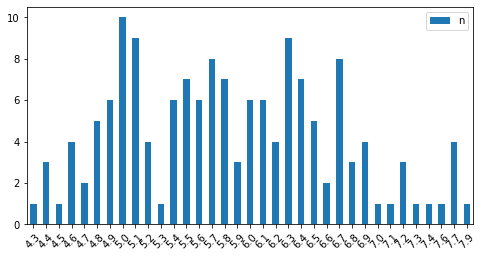

In [74]:
SEPAL_LENGTH.sort_index().plot.bar(figsize=(8,4), rot=45);

# Statistics

Operations generally exclude missing data.

Some of the stats are shown here.

## `.mean()`

In [75]:
iris.sepal_length.mean()

5.843333333333335

## `.max()`

In [76]:
iris.sepal_length.max()

7.9

## `.std()` standard deviation

In [77]:
iris.sepal_length.std()

0.8280661279778629

Correlation (default=pearson) can be computed on two fields by subsetting on them:

In [78]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [79]:
# corr on three columns

iris[['sepal_length','petal_length','sepal_width']].corr()

,sepal_length,petal_length,sepal_width
sepal_length,1.000000,0.871754,-0.11757
petal_length,0.871754,1.000000,-0.42844
sepal_width,-0.117570,-0.428440,1.00000


## `.corr()` full correlation matrix

In [80]:
iris_corr = iris.corr()

# Styling

In [81]:
iris_corr.style.background_gradient(cmap="Spectral", axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [82]:
iris_corr.style.bar(axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# Visualization

Scatterplot using Seabprn on the df columns `sepal_length`, `petal_length`.

Visualization will be covered separately in more detail.

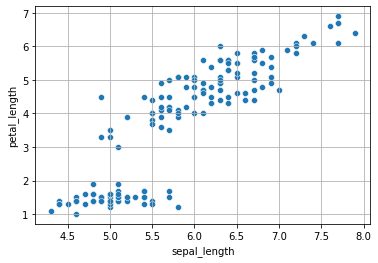

In [83]:
fig = sns.scatterplot(x=iris.sepal_length, y=iris.petal_length)
fig.grid()

# Save to CSV File

Common to save df to a csv file. The full path (path + filename) is required.  

There are also options to save to a database and to other file formats, 

Common optional parameters:
- `sep` - delimiter
- `index` - saving index column or not

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [84]:
iris.to_csv('./iris_data.csv')

## Removing Columns with `del` and `.drop()`

`del` can drop a DataFrame or single columns from the frame

In [85]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [86]:
del iris['sepal_width']

In [87]:
iris.head(2)

,sepal_length,petal_length,petal_width,species
obs_id,,,,
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa


`drop()` can drop one or more columns

takes `axis` parameter:
- axis=0 refers to rows  
- axis=1 refers to columns  

In [88]:
iris = iris.drop(['sepal_length', 'species'], axis=1)
iris.head(2)

,petal_length,petal_width
obs_id,,
0,1.4,0.2
1,1.4,0.2


# Read from CSV File

`read_csv()` reads from csv into DataFrame

takes full filepath

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [89]:
iris_loaded = pd.read_csv('./iris_data.csv')

In [90]:
iris_loaded.head(2)

,obs_id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
